# **Task A**

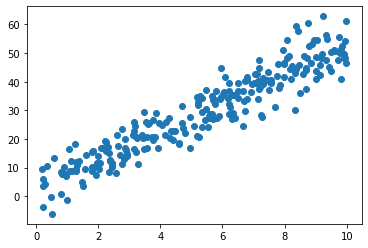

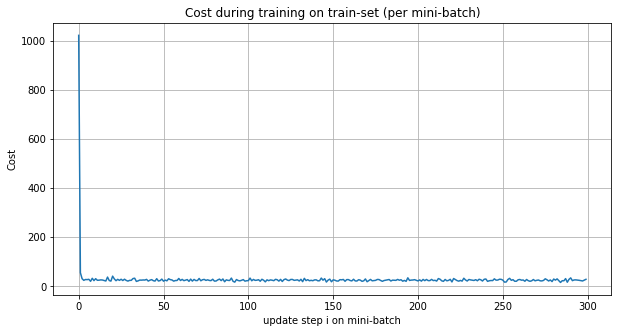

In [ ]:
# part 1: 
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor


a_true = 5.0 # choose your own value here
b_true = 3.0 # choose your own value here
sigma_epsilon = 5.0 #choose your own noise level here

X = np.random.uniform(0, 10, 250) # sample a bunch of #x_n in [0,10]
y_obs = a_true*X + b_true + sigma_epsilon*np.random.randn(len(X)) # linear relationship embedded in


X = torch.tensor(X).reshape(len(X),1).float() # comment about each row being a data-pair
y_obs = torch.tensor(y_obs).reshape(len(y_obs),1).float()
plt.scatter(X,y_obs)

my_dataset =  TensorDataset(X, y_obs)
my_dataloader = DataLoader(my_dataset,batch_size=100, shuffle=True )

model = nn.Sequential(
nn.Linear(in_features=1, out_features=1)
)


cost_function = nn.MSELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.01)  #

training_minibatch_Js =[]
training_minibatch_Js_mean =[]
nr_epochs = 100        # Try
for epoch_i in range(nr_epochs):
  for X_batch, y_batch in my_dataloader:
    
    y_preds = model(X_batch)
    cost = cost_function(y_preds, y_batch)
    
    optim.zero_grad() # Set the grads of all model params to zero.
    cost.backward() # compute and populate gradients of model params
    optim.step() # instruct optimizer to take one update step (using SGD)
    
    training_minibatch_Js.append(cost.item())
   
  
# Plot your cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel(f"update step i on mini-batch")
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()


cost is : 20.7177791595459
minimum costestimated during epoc is : 18.576763153076172


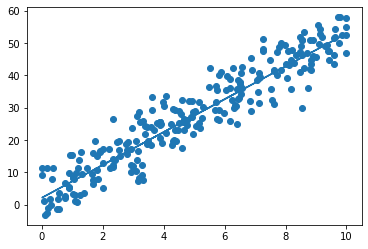

In [ ]:
with torch.no_grad():
  y_preds = model(X)


plt.scatter(X,y_obs)
plt.plot(X, y_preds)
print("cost is :",training_minibatch_Js[-1])
#print(training_minibatch_Js[-2])
#print(training_minibatch_Js[-10])
print("minimum costestimated during epoc is :", min(training_minibatch_Js))
#print(training_minibatch_Js)


In [ ]:
 # Print all parameters in your neural network model
for p in model.named_parameters():
  print(p)

('0.weight', Parameter containing:
tensor([[5.0765]], requires_grad=True))
('0.bias', Parameter containing:
tensor([2.1317], requires_grad=True))


In [ ]:
# part 2:

# CODE TEMPLATE FOR TRAINING NEURAL NETWORKS IN PYTORCH
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from numpy import genfromtxt # we use this to load data from a csv into a numpy array


my_data = genfromtxt('dataset_Marvin_Minsky.csv', delimiter=',', skip_header=1) #both x and y are in
print(len(my_data))



X = my_data[:,0] #Extract the x_n
y_obs = my_data[:,1] #Extrac the y_n

# comment about each row being a data-pair # reshape to make each row in X a data-pint x_n
X = torch.tensor(X).reshape(len(X),1).float()
# turn to column vector, each row corresponds to each y_n
y_obs = torch.tensor(y_obs).reshape(len(y_obs),1).float()

my_dataset = TensorDataset(X, y_obs) # create your dataset by turning tensors into datasets objects
#my_dataloader = DataLoader(my_dataset, batch_size=50, shuffle=True) # create your dataloader from

200


In [ ]:
'''
# Simple way to define a Fully connected feed forward ANN
model = nn.Sequential(
nn.Linear(in_features=1, out_features=5),
nn.ReLU(),
nn.Linear(in_features=5, out_features=2),
nn.Tanh(),
nn.Linear(in_features=2, out_features=1),
nn.Tanh()
)'''

In [ ]:
# fexible model:
class ResNet(nn.Module):
  def __init__(self):
    super(ResNet, self).__init__()
    self.l1=nn.Linear(in_features=1, out_features=20)
    self.l2=nn.Linear(in_features=20, out_features=5)
    self.l3=nn.Linear(in_features=5, out_features=2)
    self.output=nn.Linear(in_features=2, out_features=1)
    #self.do=nn.Dropout(0.1)
    #nn.Tanh()

    self.relu=nn.ReLU()
    
  def forward(self,x):
    #h1=nn.functional.relu(self.l1(X))
    h1=self.relu(self.l1(x))
    #h2=nn.functional.relu(self.l2(h1))
    h2=self.relu(self.l2(h1))
    h3 = self.relu(self.l3(h2))
    #do= self.do(h1+h2)
    output=self.output(h3)
    #logits=self.l3(do)
    return output



epoch 0,train cost:[9.044825553894043]
epoch 0,train cost:9.0448
epoch 1,train cost:[9.044825553894043, 5.731662750244141]
epoch 1,train cost:7.3882
epoch 2,train cost:[9.044825553894043, 5.731662750244141, 5.517454624176025]
epoch 2,train cost:6.7646
5.517454624176025


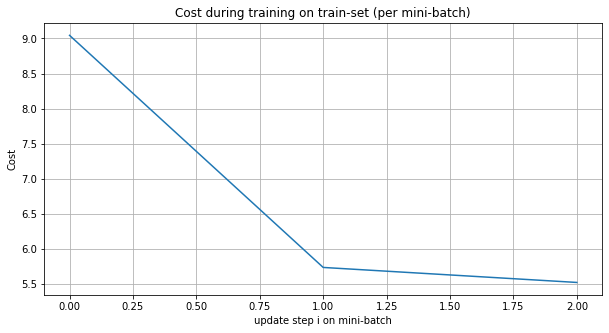

In [ ]:
my_dataloader = DataLoader(my_dataset, batch_size=200, shuffle=True)
model=ResNet()
cost_function = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)  #

training_minibatch_Js =[]
training_minibatch_Js_mean=[]

nr_epochs =3  # Try
for epoch_i in range(nr_epochs):
  for X_batch, y_batch in my_dataloader:
    #print(X_batch)
    
    y_preds = model(X_batch)
    
    optim.zero_grad() # Set the grads of all model params to zero.

    
    cost = cost_function(y_preds, y_batch)

    cost.backward() # compute and populate gradients of model params
    
    optim.step() # instruct optimizer to take one update step (using SGD)
    
    training_minibatch_Js.append(cost.item())
    print(f'epoch {epoch_i},train cost:{training_minibatch_Js}')
  print(f'epoch {epoch_i},train cost:{torch.tensor(training_minibatch_Js).mean():.4f}')

print(training_minibatch_Js[-1])
# Plot your cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel(f"update step i on mini-batch")
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()

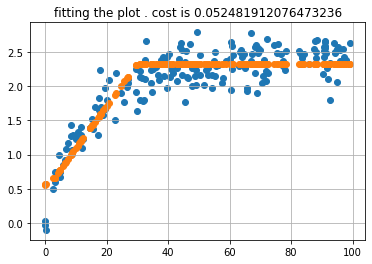

cost after 900  epoc is : 0.052481912076473236
min-cost is : 0.040205445140600204


In [ ]:
with torch.no_grad():
  y_preds = model(X)


plt.scatter(X,y_obs)
plt.scatter(X, y_preds)
plt.title(f'fitting the plot . cost is {training_minibatch_Js[-1]}')
plt.grid()
plt.show()
print(f"cost after {nr_epochs}  epoc is :",training_minibatch_Js[-1])
#print(training_minibatch_Js[-2])
#print(training_minibatch_Js[-10])
print("min-cost is :",min(training_minibatch_Js))
#print(training_minibatch_Js)

cost is : 0.056468721479177475
0.055879849940538406
min-cost is : 0.03807884827256203

In [ ]:
 # Print all parameters in your neural network model
for p in model.named_parameters():
  print(p)

('l1.weight', Parameter containing:
tensor([[-0.2151],
        [-0.7113],
        [-0.2999],
        [-0.3484],
        [-0.2197],
        [ 0.6372],
        [ 0.0148],
        [-0.7517],
        [-0.4030],
        [ 0.5066]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.5754, -0.6236, -0.6688,  0.3743, -0.3496, -0.7813,  1.0522, -0.0171,
        -0.6355,  0.2259], requires_grad=True))
('l2.weight', Parameter containing:
tensor([[ 0.1874, -0.1381,  0.2135, -0.2433,  0.3032,  0.2077, -0.1099,  0.2975,
         -0.0013, -0.0951],
        [ 0.4099,  0.0501, -0.0247, -0.1981,  0.0789, -0.2104,  0.2187, -0.2925,
         -0.0204,  0.0470],
        [ 0.1078,  0.3135, -0.0865,  0.2898, -0.1583, -0.3904,  0.3628, -0.0272,
          0.1562,  0.0761],
        [ 0.2424, -0.2582,  0.1684,  0.0476, -0.0594, -0.0708, -0.2252, -0.0411,
          0.2369,  0.2194],
        [ 0.2275,  0.3012, -0.0520,  0.2282, -0.1024, -0.2202,  0.3326,  0.0471,
         -0.0616,  0.1797]], requires